In [13]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal
from dotenv import load_dotenv
load_dotenv()

True

In [14]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation:str
    discriminant: float
    result:str

def get_equation(state:QuadState)->QuadState:
    state['equation'] = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return state

def get_discriminant(state:QuadState)->QuadState:
    state['discriminant'] = state['b']**2 - 4*state['a']*state['c']
    return state

#conditional branches
def two_real_roots(state:QuadState)->QuadState:
    state['result'] = "Two real roots"
    return state

def one_real_root(state:QuadState)->QuadState:
    state['result'] = "One real root"
    return state

def no_real_roots(state:QuadState)->QuadState:
    state['result'] = "No real roots"
    return state

# routing CONDITIONAL
def route_node(state:QuadState)->Literal['two_real_roots','one_real_root','no_real_roots']:
    if state['discriminant'] > 0:
        return 'two_real_roots'
    elif state['discriminant'] == 0:
        return 'one_real_root'
    else:
        return 'no_real_roots'


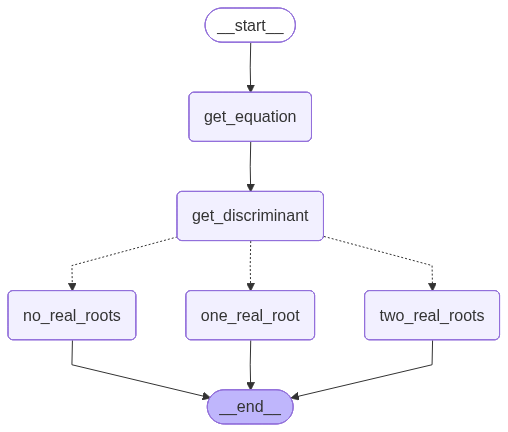

In [15]:
graph=StateGraph(QuadState)
graph.add_node("get_equation",get_equation)
graph.add_node("get_discriminant",get_discriminant)
graph.add_node("two_real_roots",two_real_roots)
graph.add_node("one_real_root",one_real_root)
graph.add_node("no_real_roots",no_real_roots)


graph.add_edge(START,"get_equation")
graph.add_edge("get_equation","get_discriminant")
graph.add_conditional_edges("get_discriminant",route_node)
graph.add_edge("two_real_roots",END)
graph.add_edge("one_real_root",END)
graph.add_edge("no_real_roots",END)

workflow=graph.compile()
workflow

In [16]:
initial_state={
    "a": 1,
    "b": -3,
    "c": 2
}

final_state=workflow.invoke(initial_state)
final_state

{'a': 1,
 'b': -3,
 'c': 2,
 'equation': '1x^2 + -3x + 2 = 0',
 'discriminant': 1,
 'result': 'Two real roots'}